# Profile most common to get a loan at Prosper
## by Patrick Amaral

## Investigation Overview

> To investigate this data I walked through the data looking for something that help me create a common profile to get a loan at Prosper.
## Dataset Overview

> The dataset consists of 81 variables, are many data but for my analysis I'm focused on borrower information like annual percentage rate, income range, occupations, your loan amount, this dataset has 113937 rows which are good enough to take a good review.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [5]:
color = sb.color_palette()[0]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Main reason that people get a loan

> This first chart we figure out the most reason for people getting a loan is to debt consolidation occupying approximately 51% of the data.

In [6]:
labels = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 
'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 
'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 
'RV', 'Taxes', 'Vacation', 'Wedding Loans']

df['ListingCategory'] = df['ListingCategory (numeric)'].apply(lambda x: labels[x])

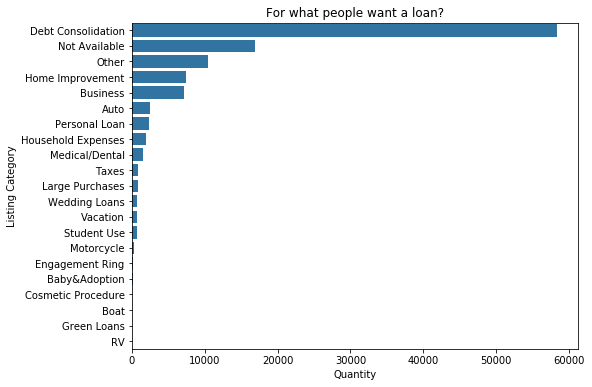

In [8]:
counts = df['ListingCategory'].value_counts()
plt.figure(figsize=(8,6))
sb.countplot(data=df, y='ListingCategory', color=color, order=counts.index)
plt.xlabel('Quantity')
plt.ylabel('Listing Category')
plt.title('For what people want a loan?');

## How long people prefer that your term was?

> The chart shows us from 2005 to 2010 almost has no one that prefers a term different of 36 months but most recently of 2011 to 2014 people began to get the term to 60 months, would be interesting investigate better with a dataset updated.

In [9]:
# Converting ListingCreationDate of object to datetime
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])

In [10]:
df['ListingYear'] = df['ListingCreationDate'].apply(lambda x: x.year)

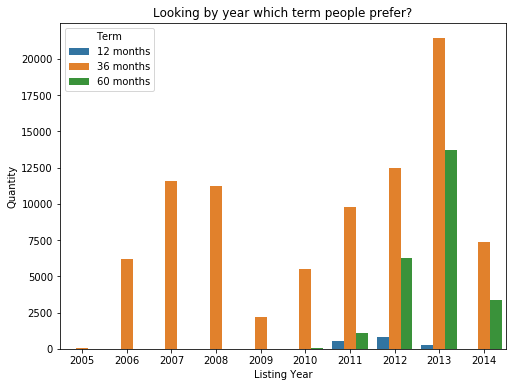

In [25]:
plt.figure(figsize=(8,6))
sb.countplot(data=df, x='ListingYear', hue='Term')
plt.title('Looking by year which term people prefer?')
plt.xlabel('Listing Year')
plt.ylabel('Quantity')
plt.legend(['12 months', '36 months', '60 months'], loc='upper left', title='Term');

## Large loan amounts have more inverstors?

>  Well apparently yes, near to 5K in the most part don't have investors but when loan amount increases the number of investors begin to increase more discrete.

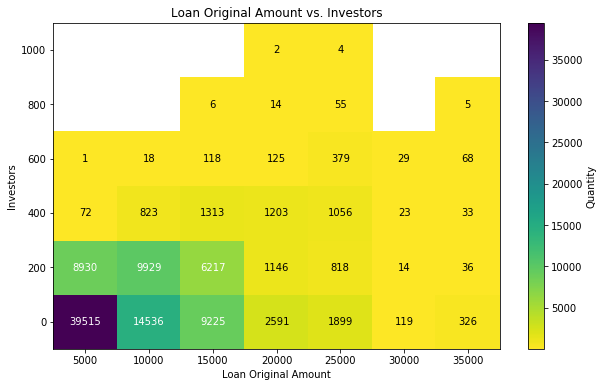

In [15]:
bins_x = np.arange(2500, 40000, 5000)
bins_y = np.arange(-100, 1200, 200)
plt.figure(figsize=(10, 6))
h2d = plt.hist2d(data=df, x='LoanOriginalAmount', y='Investors', bins=[bins_x, bins_y], cmap='viridis_r', cmin=1)
counts = h2d[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 5000: # increase visibility on darkest cells
            plt.text(bins_x[i]+2500, bins_y[j]+100, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+2500, bins_y[j]+100, int(c),
                     ha = 'center', va = 'center', color = 'black')
plt.xlabel('Loan Original Amount')
plt.ylabel('Investors')
plt.title('Loan Original Amount vs. Investors')
plt.colorbar(label='Quantity');

## Distribuition of loan amount by Prosper score and rating

> Looking at this distribution we can see that people have your loan limit according to with you rating and score, but the interesting part is that people with the rating B and score between 4 and 7 can get high values like 35K and people with the rating AA (least risk) and score between 8 and 11 don't get high values. 

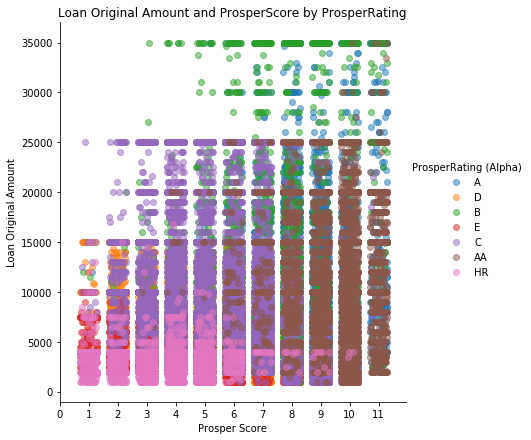

In [24]:
sb.lmplot(data=df, x='ProsperScore', y='LoanOriginalAmount', hue='ProsperRating (Alpha)',
          fit_reg=False, x_jitter=0.3, size=6, scatter_kws={'alpha': 1/2})
plt.title('Loan Original Amount and ProsperScore by ProsperRating')
plt.xlabel('Prosper Score')
plt.xticks(np.arange(0, 12, 1))
plt.ylabel('Loan Original Amount');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!